#**LangChain**

LangChain is a framework for developing applications powered by language models.

- GitHub: https://github.com/hwchase17/langchain
- Docs: https://python.langchain.com/en/latest/index.html




#**01: Install All the Required Packages**

In [1]:
!nvidia-smi

Thu Nov  9 03:55:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install -q transformers einops accelerate langchain bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 92.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 106.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.7 MB/s eta 0:00:00


#**02: Logged in with a Hugging Face account**

In a lot of cases, you must be logged in with a Hugging Face account to interact with the Hub: download private repos, upload files, create PRs,…

https://huggingface.co/docs/huggingface_hub/quick-start

In [3]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) y
Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' cre

#**03: Import All the Required Libraries**

In [5]:
from langchain.llms import HuggingFacePipeline

AutoTokenizer. A tokenizer is responsible for preprocessing text into an array of numbers as inputs to a model.

In [6]:
from transformers import AutoTokenizer

In [7]:
import transformers

In [8]:
import torch

In [9]:
import warnings
warnings.filterwarnings('ignore')

##**04: Load the Llama 2 Model**

we are using Llama 2 Chat Model with 7 Billion Parameters

The basic building block of LangChain is a Large Language Model which takes text as input and generates more text

Suppose we want to generate a company name based on the company description. In this case, since we want the output to be more random, we will intialize our model with high temprature.

The temperature parameter adjusts the randomness of the output. Higher values like 0.7 will make the output more random, while lower values like 0.2 will make it more focused and deterministic.

temperature value--> how creative we want our model to be

0 ---> temperature it means model is  very safe it is not taking any bets.

1 --> it will take risk it might generate wrong output but it is very creative

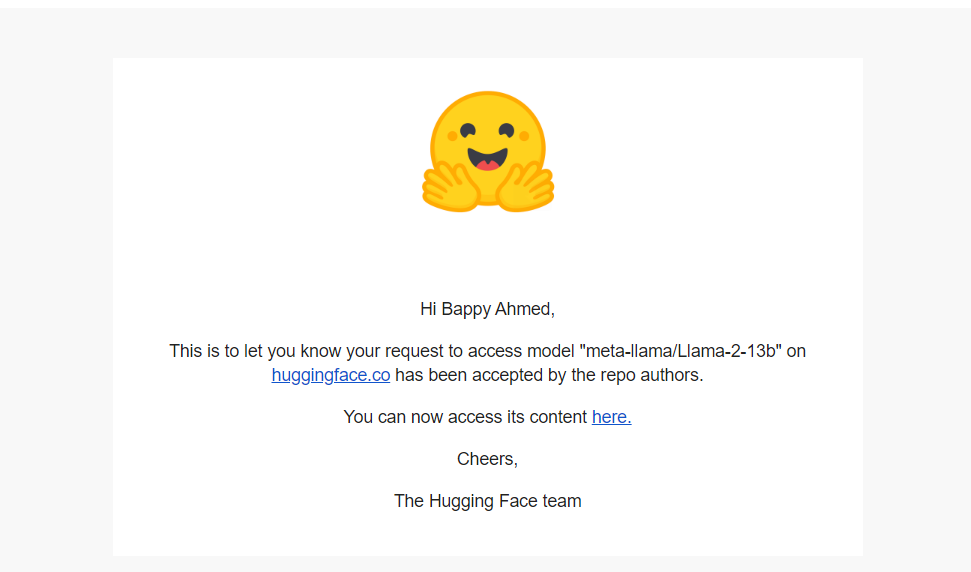

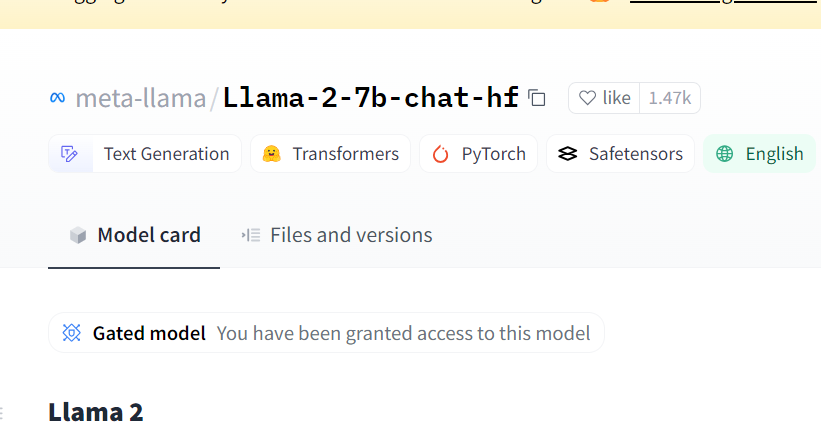

In [10]:
model="meta-llama/Llama-2-7b-chat-hf"
# model="daryl149/llama-2-7b-chat-hf"

In [11]:
tokenizer=AutoTokenizer.from_pretrained(model)

### Issue: https://github.com/facebookresearch/llama/issues/374

In [12]:
pipeline=transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
    max_length=1000,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id
    )

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [13]:
llm=HuggingFacePipeline(pipeline=pipeline, model_kwargs={'temperature':0})

In [14]:
prompt="What would be a good name for a company that makes colorful socks"

In [15]:
print(llm(prompt))

?

I would suggest the following names for a company that makes colorful socks:

1. SoleMates: This name plays on the idea of socks being a person's "sole" mate, or their best friend. It's a cute and catchy name that could work well for a company that wants to convey a sense of fun and personality.
2. Hue & Cry: This name is a play on the phrase "hue and cry," which means a loud and energetic protest or call for attention. It's a great name for a company that wants to convey a sense of vibrancy and energy.
3. Toe-Tally Awesome: This name is a play on the phrase "totally awesome," which means something that is extremely good or cool. It's a fun and lighthearted name that could work well for a company that wants to convey a sense of excitement and enthusiasm.
4. Sock It to Me: This name is a play on the phrase "sock it to me," which means to impress or surprise someone. It's a great name for a company that wants to convey a sense of excitement and energy.
5. The Sock Exchange: This name 

In [16]:
prompt="I want to open a restaurant for  indian food. Suggest me a fence name for this"

In [17]:
print(llm(prompt))

 restaurant.
I would suggest the following names for your Indian food restaurant:
1. Tandoor Nights: Tandoor is a traditional Indian clay oven used for cooking, and the name suggests a cozy and intimate setting for a dinner experience.
2. Spice Route: This name evokes the idea of a journey through the diverse spices and flavors of India, and could appeal to customers looking for a culinary adventure.
3. Mumbai Bazaar: Mumbai is known for its bustling streets and vibrant markets, and this name suggests a lively and energetic atmosphere.
4. Curry Leaf: The curry leaf is a ubiquitous ingredient in Indian cooking, and this name is simple and memorable.
5. Tikka Tandoor: Tikka is a popular Indian dish made with marinated chicken cooked in a tandoor, and this name combines the flavors of India with a modern twist.
6. Naan Stop: Naan is a popular Indian flatbread, and this name suggests a casual and approachable dining experience.
7. Biryani House: Biryani is a popular Indian rice dish, and t

##**05: Prompt Templates**

Currently in the above applications we are writing an entire prompt, if you are creating a user directed application then this is not an ideal case

LangChain faciliates prompt management and optimization.

Normally when you use an LLM in an application, you are not sending user input directly to the LLM. Instead, you need to take the user input and construct a prompt, and only then send that to the LLM.

In many Large Language Model applications we donot pass the user input directly to the Large Language Model, we add the user input to a large piece of text called prompt template

#Import All the Required Libraries

In [18]:
from langchain.prompts import PromptTemplate

In [19]:
from langchain.chains import LLMChain

#**Example 1**

In [20]:
prompt_template1=PromptTemplate(input_variables=["cuisine"],
                               template="I want to open a restaurant for {cuisine} food. Suggest a fency name for this")

In [21]:
input_prompt=prompt_template1.format(cuisine="indian")

In [22]:
print(input_prompt)

I want to open a restaurant for indian food. Suggest a fency name for this


#**Example 2**

In [23]:
prompt_template2=PromptTemplate(input_variables=["book_name"],
                               template="Provide me a concise summary of the book {book_name}")

In [24]:
input_prompt=prompt_template2.format(book_name="Alchemist")

In [25]:
print(input_prompt)

Provide me a concise summary of the book Alchemist


In [27]:
chain = LLMChain(llm=llm, prompt=prompt_template2, verbose=True)
response= chain.run("Harry Potter")
print(response)



> Entering new LLMChain chain...
Prompt after formatting:
Provide me a concise summary of the book Harry Potter

> Finished chain.
 and the Philosopher's Stone by J.K. Rowling.

Harry Potter and the Philosopher's Stone is a fantasy novel written by J.K. Rowling. The story follows the adventures of a young wizard named Harry Potter, who discovers he is famous in the wizarding world after his eleventh birthday. He receives an invitation to attend Hogwarts School of Witchcraft and Wizardry, where he makes friends with Ron Weasley and Hermione Granger. Together, they embark on a quest to find the Philosopher's Stone, a powerful magical object that can grant eternal life. Along the way, they encounter obstacles and challenges from the evil wizard Lord Voldemort, who murdered Harry's parents and seeks to return to power. The book introduces the magical world of Harry Potter and sets the stage for the series' subsequent adventures.
